<a href="https://colab.research.google.com/github/nagarajgn01/anomaly-detection-autoencoder-h2o/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement, Business context and objective 




***Learn about implementation of a machine learning algorithm using autoencoders for anomaly detection.***

# Anomaly Detection

•	What, why, where Anomaly Detection ?

>  ***Anomaly Detection is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data. Typically the anomalous items will translate to some kind of problem such as bank fraud, a structural defect, medical problems or errors in a text. Anomalies are also referred to as outliers, novelties, noise, deviations and exceptions.***

•	Why we are using  fraud dataset for this problem ?


> ***For this task, we are using Kaggle’s credit card fraud dataset. The Dataset gives >39,000 instances of credit card use, and for each transaction we know whether it is fraudulent or not. Anomaly detection is used with dataset which are severly unbalanced. In this case, only 0.26% of all transaction are fraudulent.***



•	Algorithms used to solve this problem


> ***While we could try to work with classifiers, like random forests or support vector machines, by applying over- or under-sampling techniques, we can alternatively try to find anomalies in the data (assuming our fraud cases to be anomalies within the whole dataset). In this notebook, we will be using autoencoders deep learning model for anomaly detection.***




### Install & Import necessary packages

> ***Install caret, e1071 & ROCR required for data-preprocessing, visualization & model metrics***



In [ ]:
install.packages('caret')
install.packages('e1071')
install.packages('ROCR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




> ***The R package h2o provides a convenient interface to H2O, which is an open-source machine learning and deep learning platform. H2O distributes a wide range of common machine learning algorithms for classification, regression and deep learning.***

In [ ]:
install.packages("h2o", repos=(c("http://s3.amazonaws.com/h2o-release/h2o/master/1497/R", getOption("repos"))))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RCurl’




> ***Activating libraries***

In [360]:
library(tidyverse)
library(caret)
options(warn=-1)

### Load Credit Card Fraudulent Data

> ***Import datasource from csv to dataframe***


In [371]:
creditcard <- read.csv("creditcard.csv")

### Exploratory Data Analysis

> ***The dataset contains numerical input variables V1 to V28, which are the result of a PCA transformation of the original features (which could not be provided due to confidentiality issues).
The response variable Class tell us whether a transaction was fraudulent (value = 1) or not (value = 0). 
There are two additional features, Time (time in seconds between each transaction and the first transaction) and Amount (how much money was transferred in this transaction)***

In [372]:
head(creditcard)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


> ***Distribution of target variable (Class).
39895 Non-Fraudulent transaction ,104 Fraudulent transaction***



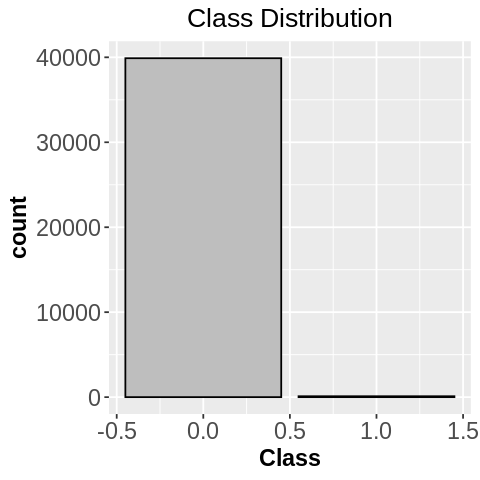

In [373]:
options(repr.plot.width=4, repr.plot.height=4)
creditcard %>% ggplot(aes(x = Class)) + 
  geom_bar(color = "black", fill = "grey") + 
  theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=16,hjust = 0.5)) +
  ggtitle("Class Distribution")

> ***Total of 86400 seconds in day. Since Max Time value in this dataset is less than 86400, we can conclude that all transaction are recorded within 24 hrs timeframe***
```
1 hr = 60 mins = 60 x 60 secs = 3600 sec
1 day = 24 Hrs = 24 x 3600 sec = 86400 sec
```



In [374]:
summary(creditcard$Time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   15012   30717   25610   35731   40052 

> ***Binning Time into four groups according to time of day. Majority of fraud cases have happened in 'Group 1'  (although, we can’t say when exactly because the original Time feature did not tell us when the first transaction occurred)***

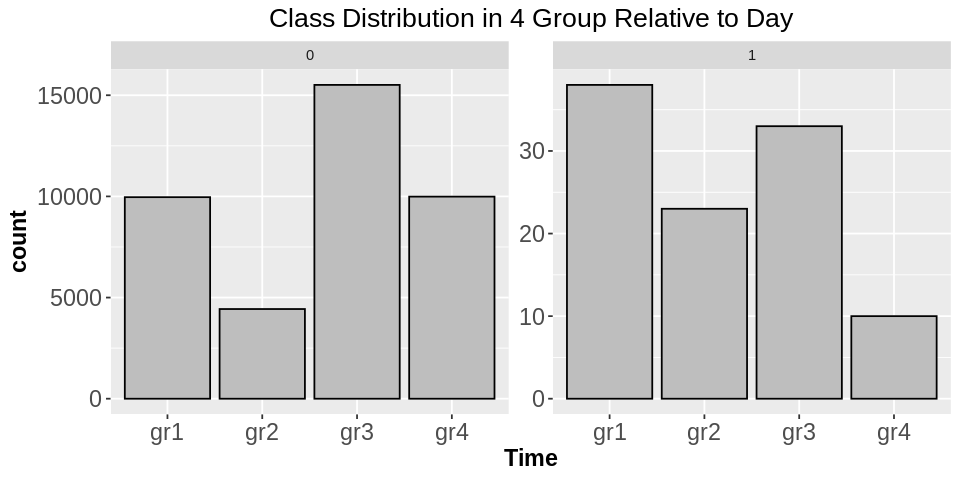

In [375]:
creditcard$Time <- as.factor(ifelse(creditcard$Time <= 15012, "gr1", # mean 1st Qu.
                                    ifelse(creditcard$Time <= 25610, "gr2", # mean mean
                                           ifelse(creditcard$Time <= 35731, "gr3", # mean 3rd Qu
                                                  "gr4"))))
# convert class variable to factor 
creditcard$Class <- factor(creditcard$Class)
options(repr.plot.width=8, repr.plot.height=4)
creditcard %>% ggplot(aes(x = Time)) + 
  geom_bar(color = "black", fill = "grey") + 
  facet_wrap( ~ Class, scales = "free", ncol = 2)+ 
  theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=16,hjust = 0.5)) +
  ggtitle("Class Distribution in 4 Bins Relative to Day")

> ***We can see that Fraudulent transaction has higher mean amount of money. However max amount is much lower when compared to regular transaction***

Amount of money summary with Class 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.46   23.69   87.57   79.00 7879.42 


Amount of money summary with Class 1


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    1.000    3.775   97.071   99.990 1809.680 

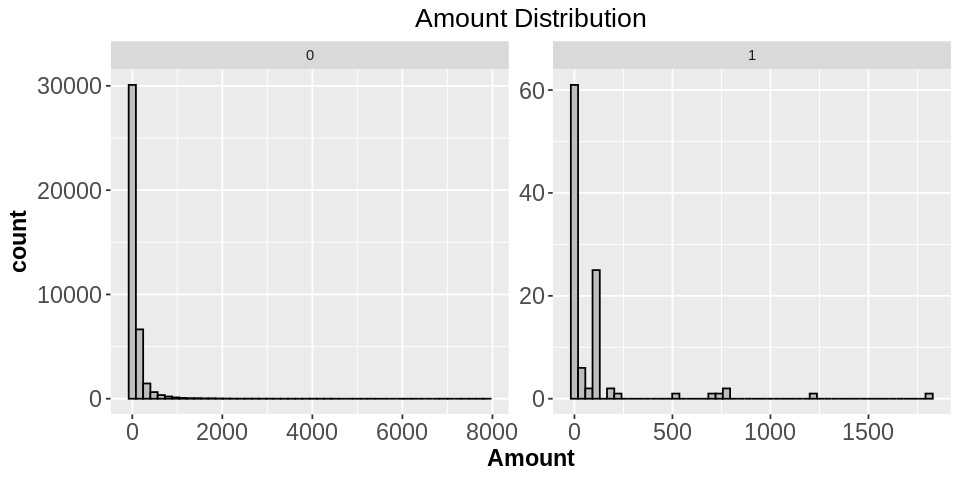

In [377]:
cat("Amount of money summary with Class 0\n")
summary(creditcard[creditcard$Class == "0", ]$Amount)
cat('\nAmount of money summary with Class 1\n')
summary(creditcard[creditcard$Class == "1", ]$Amount)
cat("\n")
creditcard %>%
  ggplot(aes(x = Amount)) +
    geom_histogram(color = "black", fill = "grey", bins = 50) +
    facet_wrap( ~ Class, scales = "free", ncol = 2)+ 
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=16,hjust = 0.5)) +
    ggtitle("Amount Distribution")

### Modeling

> ***Activate h2o and instantiate an instance***

In [249]:
library(h2o)
h2o.init(nthreads = -1)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 hours 33 minutes 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.0.1 
    H2O cluster version age:    6 months and 3 days !!! 
    H2O cluster name:           H2O_started_from_R_root_eij946 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.12 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 4.0.5 (2021-03-31) 



> ***Convert data to H2OFrame***

In [378]:
creditcard_hf <- as.h2o(creditcard)

  |======================================================================| 100%


> ***We will split data into training and test set. Since we want to check if pretrained model can help improve performance, we are splitting data into two training set and one common test set for model comparision***

In [379]:
splits <- h2o.splitFrame(creditcard_hf, ratios = c(0.4,0.4), seed = 42) 
train_unsupervised <- splits[[1]] # 40% data
train_supervised <- splits[[2]] # 40% data
test <- splits[[3]] # 20% data

> ***Separate dependent and independent variables***

In [380]:
response <- "Class" 
features <- setdiff(colnames(train_unsupervised), response)

### Deep Learning with Autoencoders
*   Understanding neural networks
> ***Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. A neural network works similarly to the human brain’s neural network. A “neuron” in a neural network is a mathematical function that collects and classifies information according to a specific architecture. The network bears a strong resemblance to statistical methods such as curve fitting and regression analysis.***
*   Understanding deep neural networks
> ***A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers.***                                                  
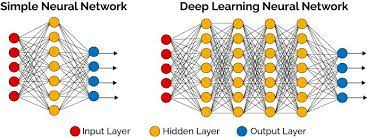
*   Understanding auto encoders
> ***AutoEncoder is a generative unsupervised deep learning algorithm used for reconstructing high-dimensional input data using a neural network. The Autoencoder accepts high-dimensional input data, compress it down to the latent-space representation in the bottleneck hidden layer; the Decoder takes the latent representation of the data as an input to reconstruct the original input data. For Anomaly detection, we use Autoencoders which tries to minimize the reconstruction error as part of its training. Then anomalies are detected by checking the magnitude of the reconstruction loss.***
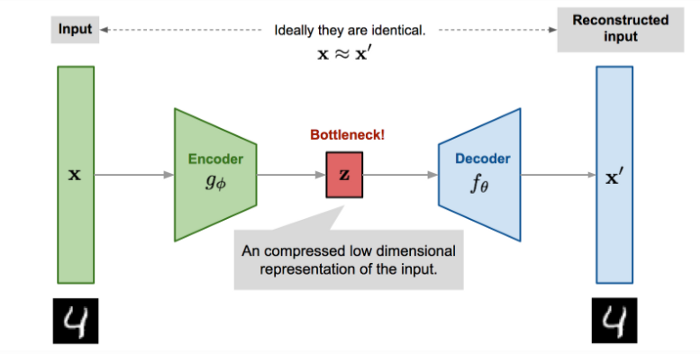










### Unsupervised Learning

> ***First, we are training the unsupervised neural network model using deep learning autoencoders. With h2o, we can simply set autoencoder = TRUE.
Here, we are applying a technique called “bottleneck” training, where the hidden layer in the middle is very small. This means that  model will have to reduce the dimensionality of the input data (in this case, down to 2 nodes/dimensions).
The autoencoder model will then learn the patterns of the input data irrespective of given class labels. Here, it will learn, which credit card transactions are similar and which transactions are outliers or anomalies***

*   autoencoder=TRUE -> Generate Autoencoder deep neural network
*   features -> Independent Variables (Time,Amount,V1 to V28)
*   train_unsupervised -> training set 1
*   model_nn -> Model name
*   reproducible = TRUE -> to obtain reproducible results
*   ignore_const_cols = FALSE -> Since variable are PCA transformed, turn-off ignore constant columns
*   hidden = c(10, 2, 10) -> Hidden layer with 10-2-10 units
*   epochs = 100 -> No. of passes of entire Dataset
*   activation = "Tanh" -> Tanh activation function















In [381]:
model_nn <- h2o.deeplearning(x = features, training_frame = train_unsupervised, 
                             model_id = "model_nn", autoencoder = TRUE, 
                             reproducible = TRUE, 
                             ignore_const_cols = FALSE, seed = 42, 
                             hidden = c(10, 2, 10), 
                             epochs = 100, activation = "Tanh")
model_nn

  |======================================================================| 100%


Model Details:

H2OAutoEncoderModel: deeplearning
Model ID:  model_nn 
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 776 weights/biases, 16.4 KB, 1,603,800 training samples, mini-batch size 1
  layer units  type dropout       l1       l2 mean_rate rate_rms momentum
1     1    34 Input  0.00 %       NA       NA        NA       NA       NA
2     2    10  Tanh  0.00 % 0.000000 0.000000  0.325388 0.271496 0.000000
3     3     2  Tanh  0.00 % 0.000000 0.000000  0.008344 0.004532 0.000000
4     4    10  Tanh  0.00 % 0.000000 0.000000  0.098890 0.112646 0.000000
5     5    34  Tanh      NA 0.000000 0.000000  0.350704 0.406478 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2   -0.051042   0.633883 -0.068893 0.775628
3   -0.115926   0.403429  0.142009 0.000143
4    0.220332   1.075593 -0.100378 0.453583
5    0.009270   0.745439  0.195297 0.772887


H2OAutoEncoderMetrics: deeplearning
** Reported on training data. 

> ***We now call the h2o.anomaly function to reconstruct the original data set using the reduced set of features and calculate a means squared error between both. Here we set per_feature parameter to FALSE in the h2o.anomaly function call as we want a reconstruction meany error based on observations, not individual features***

In [382]:
anmlt <- h2o.anomaly(model_nn, train_unsupervised, per_feature = FALSE) %>% as.data.frame() %>% mutate(Class = as.vector(train_unsupervised[, 31]))
head(anmlt)

,Reconstruction.MSE,Class
,<dbl>,<chr>
1,0.007559668,0
2,0.003424165,0
3,0.002125653,0
4,0.001378344,0
5,0.003121873,0
6,0.002359252,0


> ***Calculate the threshold value. Various methods can be used such as calculating the quantiles, max, median, min etc. It all depends on the use case. Here we will use quantile with probability of 99.4%.***

In [383]:
threshold <- quantile(anmlt$Reconstruction.MSE, probs = 0.994)
threshold

99.4% 
0.01621754

> ***Calculate anomaly scores for test data***

In [384]:
test_anmlt <- h2o.anomaly(model_nn, test, per_feature = FALSE) %>% as.data.frame() %>% mutate(Class = as.vector(test[, 31]))
results <- data.frame(rbind(anmlt,test_anmlt), threshold)
results$rowname = seq.int(nrow(results)) 

> ***The results are plotted below. The x axis is the observations and y axis is the anomaly score. The blue points are actual anomalies and horizontal line indicate threshold for Reconstruction MSE (decision boundary).***

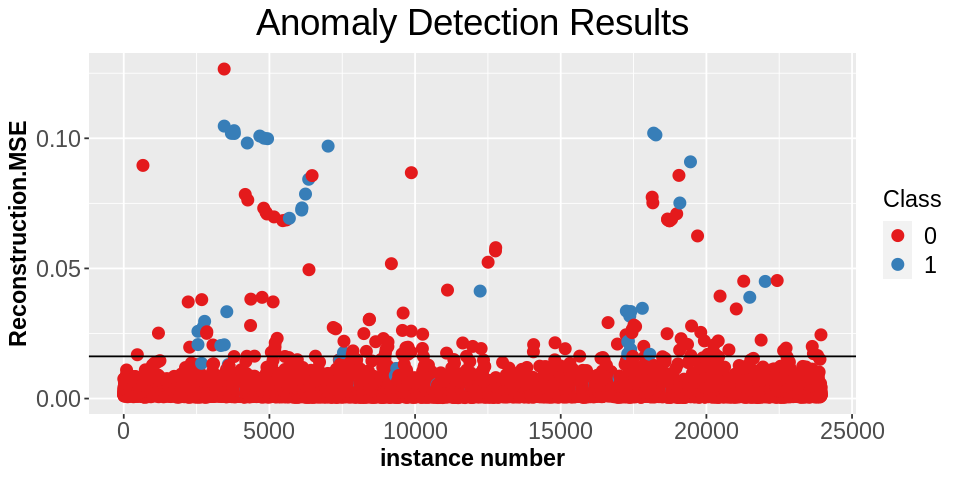

In [385]:
ggplot(results, aes(x = as.numeric(rowname), y = Reconstruction.MSE, color = as.factor(Class))) +
  geom_point(alpha = 1,size = 3) +
  geom_hline(yintercept = threshold) +
  scale_color_brewer(palette = "Set1") +
  labs(x = "instance number", color = "Class") +
  theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=22,hjust = 0.5)) +
  ggtitle("Anomaly Detection Results")

> ***Measure model performance on test data. We see that with this model we could detect 84.21% anomalies which is pretty good results. Depending on use case we can try different threshold for better results***

In [386]:
results_unsup <- data.frame(as.integer(test_anmlt$Reconstruction.MSE > threshold),as.vector(test[, 31]))
colnames(results_unsup) <- c("predict","actual")
results_unsup %>%
  group_by(actual, predict) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

`summarise()` has grouped output by 'actual'. You can override using the `.groups` argument.



actual,predict,n,freq
<chr>,<int>,<int>,<dbl>
0,0,7839,0.994544532
0,1,43,0.005455468
1,0,3,0.157894737
1,1,16,0.842105263


### Supervised Learning

> ***We can further use the reduced dimensionality representation of one of the hidden layers as features for supervised model training. An example would be to use the 10 features from the first or third hidden layer. We will h20 deepfeatures to extract features from third hidden layer***

In [387]:
train_features <- h2o.deepfeatures(model_nn, train_unsupervised, layer = 3) %>%
  as.data.frame() %>%
  mutate(Class = as.factor(as.vector(train_unsupervised[, 31]))) %>%
  as.h2o()

  |======================================================================| 100%
  |======================================================================| 100%


> ***Define independent feature space***

In [388]:
features_dim <- setdiff(colnames(train_features), response)

> ***We will use dimensionally reduced feature to train supervised deep neural network to detect anomaly***

*   response -> target variable (Class)
*   features_dim -> column names of dimensionally reduced features
*   train_features -> dimensionaly reduced features
*   reproducible = TRUE -> to obtain reproducible results
*   balance_classes = TRUE -> Used to balance class distribution by under or oversampling. However model will correct final probabilities with monotonic transform
*   ignore_const_cols = FALSE -> Since variable are PCA transformed, turn-off ignore constant columns
*   hidden = c(10, 2, 10) -> Hidden layer with 10-2-10 units
*   epochs = 100 -> No. of passes of entire Dataset
*   activation = "Tanh" -> Tanh activation function





In [389]:
model_nn_dim <- h2o.deeplearning(y = response,
                               x = features_dim,
                               training_frame = train_features,
                               reproducible = TRUE, #slow - turn off for real problems
                               balance_classes = TRUE,
                               ignore_const_cols = FALSE,
                               seed = 42,
                               hidden = c(10, 2, 10), 
                               epochs = 100,
                               activation = "Tanh")
model_nn_dim

  |======================================================================| 100%


Model Details:

H2OBinomialModel: deeplearning
Model ID:  DeepLearning_model_R_1618225979704_119 
Status of Neuron Layers: predicting Class, 2-class classification, bernoulli distribution, CrossEntropy loss, 184 weights/biases, 7.6 KB, 352,077 training samples, mini-batch size 1
  layer units    type dropout       l1       l2 mean_rate rate_rms momentum
1     1    10   Input  0.00 %       NA       NA        NA       NA       NA
2     2    10    Tanh  0.00 % 0.000000 0.000000  0.003445 0.003633 0.000000
3     3     2    Tanh  0.00 % 0.000000 0.000000  0.002475 0.003233 0.000000
4     4    10    Tanh  0.00 % 0.000000 0.000000  0.114277 0.147590 0.000000
5     5     2 Softmax      NA 0.000000 0.000000  0.037606 0.048411 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2   -0.100174   0.861062  0.103862 0.585938
3   -0.188222   0.842381  0.075080 0.118430
4    0.041641   0.495822  0.042209 0.121388
5    0.563955   1.184857  0.000000 0.143312


> ***For measuring model performance on test data, we need to convert the test data to the same reduced dimensions as the trainings data***

In [390]:
test_dim <- h2o.deepfeatures(model_nn, test, layer = 3)

  |======================================================================| 100%


> ***Now, this actually looks quite good in terms of identifying fraud cases: 89.5% of fraud cases were identified! However, many non-fraud cases were also classified as fraud. For real-life application, this wouldn’t be a good model***

In [391]:
h2o.predict(model_nn_dim, test_dim) %>%
  as.data.frame() %>%
  mutate(actual = as.vector(test[, 31])) %>%
  group_by(actual, predict) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

  |======================================================================| 100%


`summarise()` has grouped output by 'actual'. You can override using the `.groups` argument.



actual,predict,n,freq
<chr>,<fct>,<int>,<dbl>
0,0,3198,0.4057346
0,1,4684,0.5942654
1,0,2,0.1052632
1,1,17,0.8947368


### Pre-trained Supervised Learning (Transfer Learning)

> ***Further we are using autoencoder model as pre-training input for a supervised model. We are here again using deep neural network. This model will now use weights from the autoencoder for model fitting.***
*   response -> target variable (Class)
*   features -> independent variable (Time, Amount, V1 to V28)
*   train_supervised -> train dataset 2
*   pretrained_autoencoder  = "model_nn" -> to enable use of autoencoder pre-trained model weights (transfer learning)
*   reproducible = TRUE -> to obtain reproducible results
*   balance_classes = TRUE -> Used to balance class distribution by under or oversampling. However model will correct final probabilities with monotonic transform
*   ignore_const_cols = FALSE -> Since variable are PCA transformed, turn-off ignore constant columns
*   hidden = c(10, 2, 10) -> Hidden layer with 10-2-10 units
*   epochs = 100 -> No. of passes of entire Dataset
*   activation = "Tanh" -> Tanh activation function


In [392]:
model_nn_2 <- h2o.deeplearning(y = response,
                               x = features,
                               training_frame = train_supervised,
                               pretrained_autoencoder  = "model_nn",
                               reproducible = TRUE, #slow - turn off for real problems
                               balance_classes = TRUE,
                               ignore_const_cols = FALSE,
                               seed = 42,
                               hidden = c(10, 2, 10), 
                               epochs = 100,
                               activation = "Tanh")
model_nn_2

  |======================================================================| 100%


Model Details:

H2OBinomialModel: deeplearning
Model ID:  DeepLearning_model_R_1618225979704_131 
Status of Neuron Layers: predicting Class, 2-class classification, bernoulli distribution, CrossEntropy loss, 424 weights/biases, 12.1 KB, 1,056,561 training samples, mini-batch size 1
  layer units    type dropout       l1       l2 mean_rate rate_rms momentum
1     1    34   Input  0.00 %       NA       NA        NA       NA       NA
2     2    10    Tanh  0.00 % 0.000000 0.000000  0.813176 0.377658 0.000000
3     3     2    Tanh  0.00 % 0.000000 0.000000  0.004187 0.002128 0.000000
4     4    10    Tanh  0.00 % 0.000000 0.000000  0.035646 0.102071 0.000000
5     5     2 Softmax      NA 0.000000 0.000000  0.005266 0.002125 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2   -0.032025   0.587983  0.085849 1.117132
3   -0.090482   0.434420  0.524944 0.232917
4    0.604671   1.020529  0.318562 0.951015
5    0.563535   1.849452  0.000000 1.4189

> ***Measuring model performance on test data***

In [393]:
pred <- as.data.frame(h2o.predict(object = model_nn_2, newdata = test)) %>%  mutate(actual = as.vector(test[, 31]))

  |======================================================================| 100%


> ***Even though we have missed 4 fraudulent, we have brought down misclssification of non-fraudulent cases from 4684 to 10***

`summarise()` has grouped output by 'actual'. You can override using the `.groups` argument.



actual,predict,n,freq
<chr>,<fct>,<int>,<dbl>
0,0,7872,0.998731286
0,1,10,0.001268714
1,0,4,0.210526316
1,1,15,0.789473684


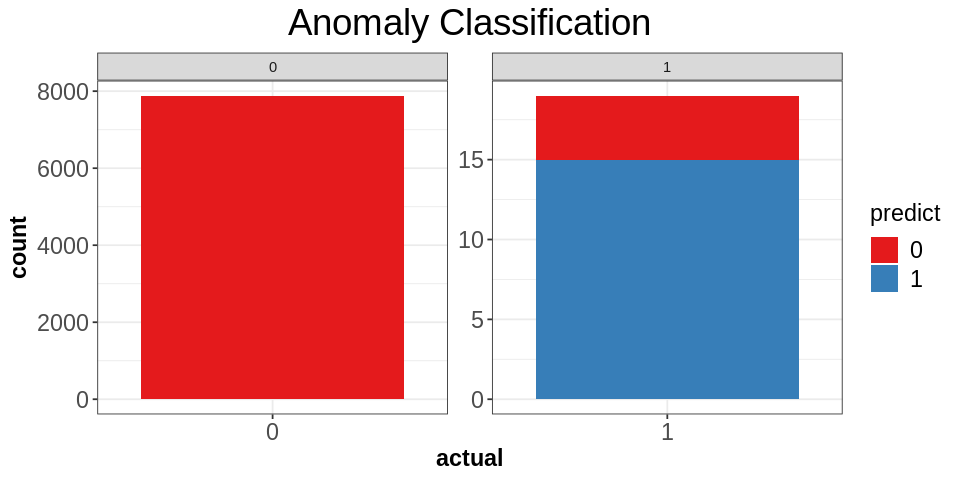

In [394]:
pred %>%
  group_by(actual, predict) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n)) 
options(repr.plot.width=8, repr.plot.height=4)
cat("\n")
pred %>%
  ggplot(aes(x = actual, fill = predict)) +
    geom_bar() +
    theme_bw() +
    scale_fill_brewer(palette = "Set1") +
    facet_wrap( ~ actual, scales = "free", ncol = 2)+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=22,hjust = 0.5)) +
    ggtitle("Anomaly Classification")

### Model Performance Metrics

> ***Due of the severe bias towards non-fraud cases, we can not use performance measures like accuracy or area under the curve (AUC), as they would give overly optimistic results based on the high percentage of correct classifications of the majority class. An alternative to AUC is to use the precision-recall curve or the sensitivity (recall)-specificity curve. The precision-recall curve tells us the relationship between correct fraud predictions and the proportion of fraud cases that were detected (e.g. if all or most fraud cases were identified, we also have many non-fraud cases predicted as fraud and vice versa). The sensitivity-specificity curve thus tell us the relationship between correctly identified classes of both labels***

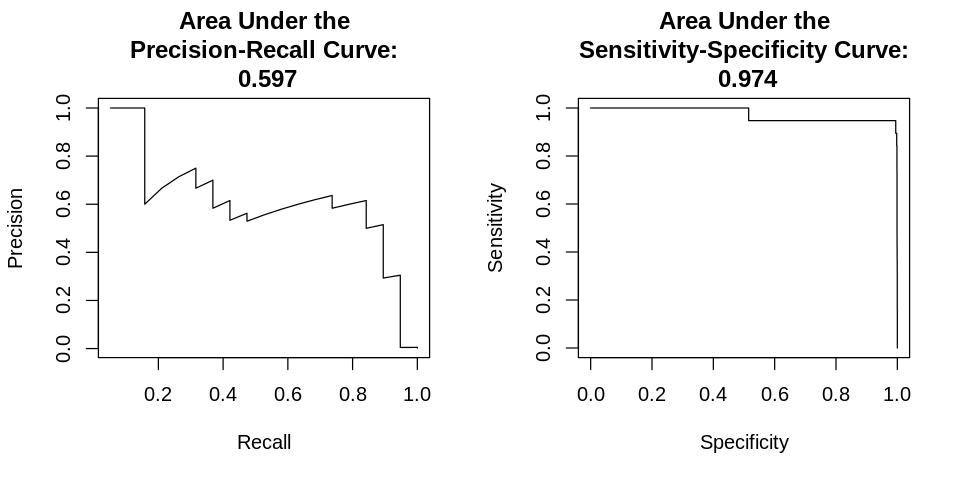

In [395]:
library(ROCR)
line_integral <- function(x, y) {
  dx <- diff(x)
  end <- length(y)
  my <- (y[1:(end - 1)] + y[2:end]) / 2
  sum(dx * my)
} 
prediction_obj <- prediction(pred$p1, pred$actual)
par(mfrow = c(1, 2))
par(mar = c(5.1,4.1,4.1,2.1))
# precision-recall curve
perf1 <- performance(prediction_obj, measure = "prec", x.measure = "rec") 
x <- perf1@x.values[[1]]
y <- perf1@y.values[[1]]
y[1] <- 0
plot(perf1, main = paste("Area Under the\nPrecision-Recall Curve:\n", round(abs(line_integral(x,y)), digits = 3)))
# sensitivity-specificity curve
perf2 <- performance(prediction_obj, measure = "sens", x.measure = "spec") 
x <- perf2@x.values[[1]]
y <- perf2@y.values[[1]]
y[1] <- 0
plot(perf2, main = paste("Area Under the\nSensitivity-Specificity Curve:\n", round(abs(line_integral(x,y)), digits = 3)))

> ***Try  different prediction thresholds and calculating how many cases were correctly classified in the two classes***

`summarise()` has grouped output by 'actual', 'x'. You can override using the `.groups` argument.



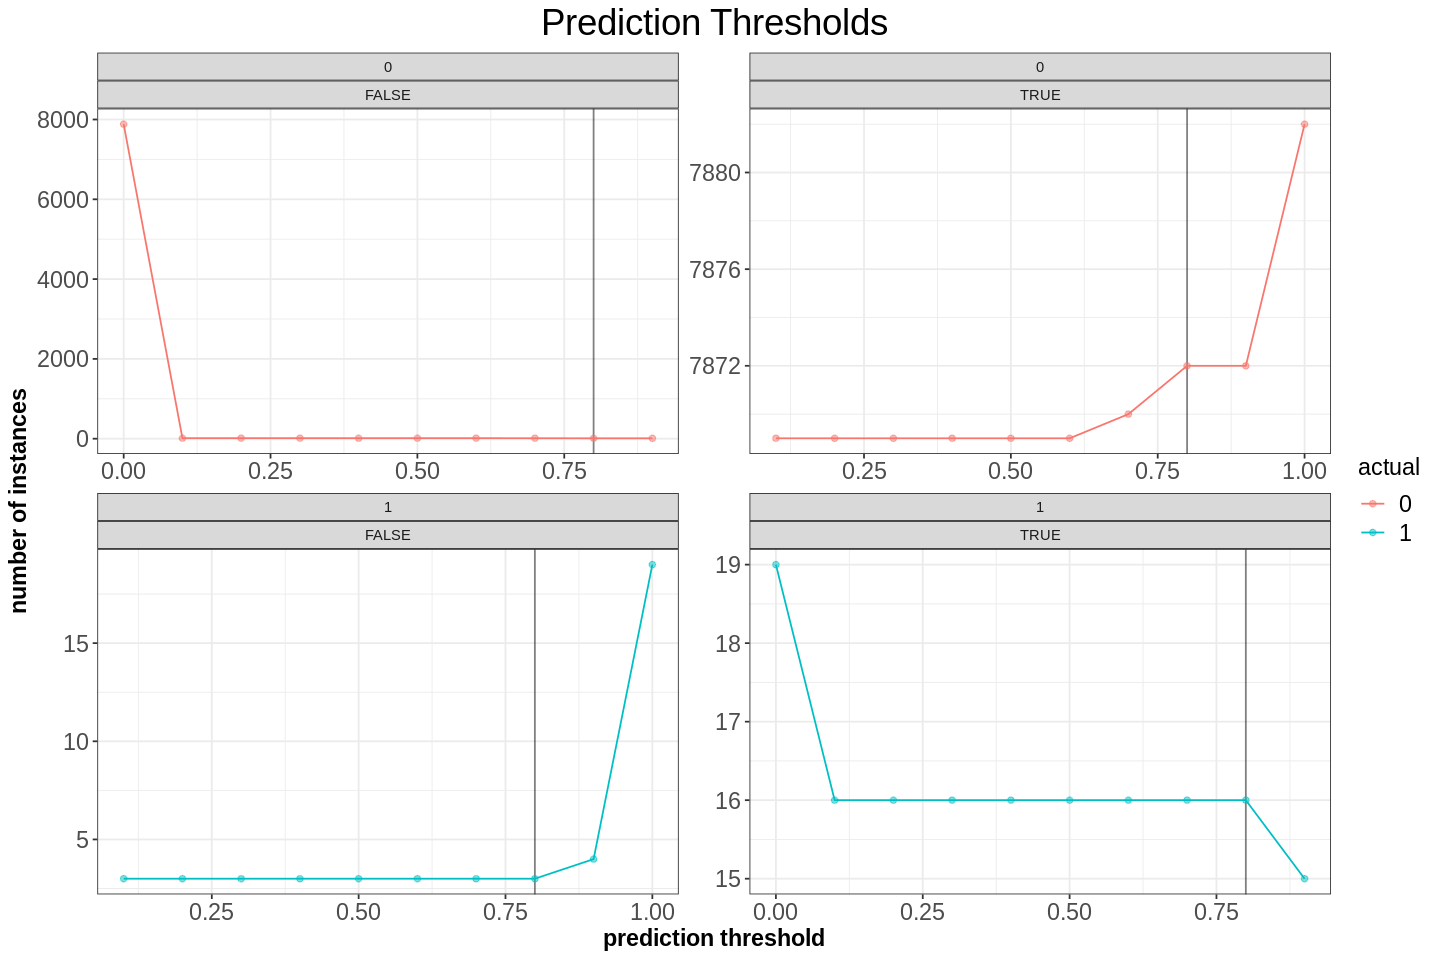

In [396]:
thresholds <- seq(from = 0, to = 1, by = 0.1)
pred_thresholds <- data.frame(actual = pred$actual)

for (threshold in thresholds) {  
  prediction <- ifelse(pred$p1 > threshold, 1, 0)
  prediction_true <- ifelse(pred_thresholds$actual == prediction, TRUE, FALSE)
  pred_thresholds <- cbind(pred_thresholds, prediction_true)
}

colnames(pred_thresholds)[-1] <- thresholds
options(repr.plot.width=12, repr.plot.height=8)
pred_thresholds %>%
  gather(x, y, 2:ncol(pred_thresholds)) %>%
  group_by(actual, x, y) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = as.numeric(x), y = n, color = actual)) +
    geom_vline(xintercept = 0.8, alpha = 0.5) +
    geom_line() +
    geom_point(alpha = 0.5) +
    theme_bw() +
    facet_wrap(actual ~ y, scales = "free", ncol = 2) +
    labs(x = "prediction threshold",
         y = "number of instances")+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=22,hjust = 0.5)) +
    ggtitle("Prediction Thresholds")

> ***This plot tells us that we can increase the number of correctly classified fraud cases without loosing correctly classified non-fraud cases when we increase the prediction threshold from the default 0.5 to 0.8. Our final model now correctly identified 84.21% of fraud cases and almost 100% of non-fraud cases.***

In [397]:
pred %>%
  mutate(predict = ifelse(pred$p1 > 0.8, 1, 0)) %>%
  group_by(actual, predict) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n)) 

`summarise()` has grouped output by 'actual'. You can override using the `.groups` argument.



actual,predict,n,freq
<chr>,<dbl>,<int>,<dbl>
0,0,7872,0.998731286
0,1,10,0.001268714
1,0,3,0.157894737
1,1,16,0.842105263


# Conclusion

> ***Supervised learning is the scenario in which the model is trained on the labeled data, and trained model will predict the unseen data.  Whereas in unsupervised learning, no labels are presented for data to train upon. Each of the methodologies has its advantages, and disadvantages like supervised learning models do produce highly accurate results, whereas unsupervised learning models do not improve performance over the period.***

> ***And when we have majority of data with no label and some data with labels, we utilize hybrid semi-supervised learning for anomaly detection***

> ***All three techniques have been discussed in this notebook and almost all of them showed similar results. Depending on the dataset & usecase, appropriate technique can be chosen***